In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt       
import matplotlib as mpl               
import matplotlib.font_manager as fm    

In [57]:
file1 = r'ProjectData\한국무역통계 총괄 - K-stat 수출입 무역통계.xls'  # 단위 달러 
file2 = r'ProjectData\kor_jap_eximport.xlsx'  # xml -> xlsx 로 엑셀로 저장 포맷 변경

In [58]:
# 한국 수출 수입 데이터
KorAll_DF = pd.read_excel(file1, skiprows=3,usecols=[1,2,4], index_col=0)
KorAllPer_DF = pd.read_excel(file1, skiprows=3, usecols=[1,3,5], index_col=0) # 수출 증감률, 수입 증감률

# 모든 국가별 수입/수출 데이터  
allContry_DF = pd.read_excel(file2, header =1, index_col=[0,1])
allContry_DF.drop(labels='단위', axis=1,inplace=True)

# 한국 전체 수출 데이터
KorAllExport_Sr = KorAll_DF['금액'].sort_index(ascending=True)
# 한국 전체 수입 데이터
KorAllImport_Sr = KorAll_DF['금액.1'].sort_index(ascending=True)

# 한국 수출 증감률 데이터
KorAllExportPer_Sr = KorAllPer_DF['증감률'].sort_index(ascending=True)
# 한국 수입 증감률 데이터
KorAllImportPer_Sr = KorAllPer_DF['증감률.1'].sort_index(ascending=True)

# 한국-일본 수출 데이터
KorJapExport_Sr = allContry_DF.loc[('일본','수출금액[천불]')]
# 한국-일본 수입 데이터
KorJapImport_Sr = allContry_DF.loc[('일본','수입금액[천불]')]

In [59]:
# 형변환 - 통일
KorJapExport_Sr = KorJapExport_Sr.astype('float')
KorJapImport_Sr = KorJapImport_Sr.astype('float')
KorAllImport_Sr = KorAllImport_Sr.astype('float')
KorAllExport_Sr = KorAllExport_Sr.astype('float')

# 억만 달러 단위로 변환 - 통일
KorJapImport_Sr = KorJapImport_Sr//100000
KorJapExport_Sr = KorJapExport_Sr//100000
KorAllExport_Sr = KorAllExport_Sr//100000
KorAllImport_Sr = KorAllImport_Sr//100000

# Sr 이름 변경
KorAllImport_Sr.name = '한국 전체 수입량'
KorAllExport_Sr.name = '한국 전체 수출량'
KorJapExport_Sr.name = '한국-일본 수출량'
KorJapImport_Sr.name = '한국-일본 수입량'
KorAllImportPer_Sr.name = '증감률'

In [60]:
Iindexs = ['-'.join([y, m[:2]]) for y,m in KorJapImport_Sr.index.str.split('.')]
Eindexs = ['-'.join([y, m[:2]]) for y,m in KorJapImport_Sr.index.str.split('.')]

KorJapExport_Sr.index = Eindexs
KorJapImport_Sr.index = Iindexs 

In [61]:
KorJapImport_Sr.index = KorJapImport_Sr.index.astype('datetime64[ns]')
KorJapExport_Sr.index = KorJapExport_Sr.index.astype('datetime64[ns]')

In [62]:
# 2019-2020년 월 단위 수출 수입량 데이터
mask = (KorJapImport_Sr.index.year == 2019) | (KorJapImport_Sr.index.year == 2020)
KorJapImport1920_Sr = KorJapImport_Sr[mask]

mask = (KorJapExport_Sr.index.year == 2019) | (KorJapExport_Sr.index.year == 2020)
KorJapExport1920_Sr = KorJapExport_Sr[mask]
KorJapExport1920_Sr

KorJap1920_DF = pd.concat([KorJapExport1920_Sr,KorJapImport1920_Sr], axis = 1).T
KorJap1920_DF

,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,...,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01
한국-일본 수출량,26.0,22.0,22.0,22.0,25.0,22.0,25.0,22.0,23.0,23.0,...,24.0,19.0,17.0,18.0,19.0,17.0,21.0,19.0,21.0,23.0
한국-일본 수입량,40.0,38.0,43.0,46.0,37.0,38.0,42.0,38.0,38.0,38.0,...,43.0,39.0,31.0,35.0,38.0,35.0,38.0,39.0,40.0,47.0


In [63]:
# 년도 통합 및 년도 별 총계로 새로운 DF 생성
kjDict = {}

for i in KorJapExport_Sr.index:
    if i.year not in kjDict:
        kjDict[i.year] = 0
    kjDict[i.year]+= KorJapExport_Sr[i]

kjDict2 = {}

for i in KorJapImport_Sr.index:
    if i.year not in kjDict2:
        kjDict2[i.year] = 0
    kjDict2[i.year]+= KorJapImport_Sr[i]
kjDict2

{2014: 532.0,
 2015: 454.0,
 2016: 469.0,
 2017: 545.0,
 2018: 540.0,
 2019: 472.0,
 2020: 453.0,
 2021: 540.0,
 2022: 542.0,
 2023: 433.0}

In [64]:

KorJapExport_Sr = pd.Series(kjDict,name = '한국-일본 수출량')
KorJapExport_Sr

KorJapImport_Sr = pd.Series(kjDict2,name = '한국-일본 수입량')
KorJapImport_Sr


2014    532.0
2015    454.0
2016    469.0
2017    545.0
2018    540.0
2019    472.0
2020    453.0
2021    540.0
2022    542.0
2023    433.0
Name: 한국-일본 수입량, dtype: float64

In [65]:
KorJapExport_Sr.index = [f'{i}년' for i in KorJapExport_Sr.index]
KorJapExport_Sr
KorJapImport_Sr.index = [f'{i}년' for i in KorJapImport_Sr.index]
KorJapImport_Sr

2014년    532.0
2015년    454.0
2016년    469.0
2017년    545.0
2018년    540.0
2019년    472.0
2020년    453.0
2021년    540.0
2022년    542.0
2023년    433.0
Name: 한국-일본 수입량, dtype: float64

Text(0.5, 0.98, '[2019-2020년도 일본 수출/입량 파이 분석]')

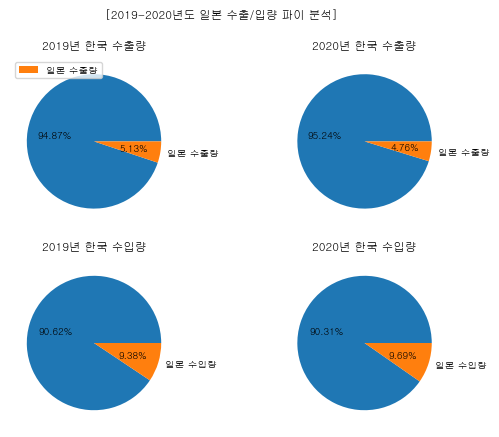

In [87]:
# 전체 - 일본 량 구하기
KorMinusJanESr = KorAllExport_Sr - KorJapExport_Sr
KorMinusJanESr.dropna(inplace=True)
KorMinusJanISr = KorAllImport_Sr - KorJapImport_Sr
KorMinusJanISr.dropna(inplace=True)

plt.subplot(2,2,1)
plt.pie([KorMinusJanESr['2019년'],KorJapExport_Sr['2019년']],labels=['', '일본 수출량'], autopct="%.2f%%")
plt.legend(loc = 'upper left')
plt.title('2019년 한국 수출량')
plt.subplot(2,2,2)
plt.title('2020년 한국 수출량')
plt.pie([KorMinusJanESr['2020년'],KorJapExport_Sr['2020년']],labels=['', '일본 수출량'], autopct="%.2f%%")
plt.rc('font', size = 7)
plt.subplot(2,2,3)
plt.pie([KorMinusJanISr['2019년'],KorJapImport_Sr['2019년']],labels=['', '일본 수입량'], autopct="%.2f%%")
plt.title('2019년 한국 수입량')
plt.subplot(2,2,4)
plt.title('2020년 한국 수입량')
plt.pie([KorMinusJanISr['2020년'],KorJapImport_Sr['2020년']],labels=['', '일본 수입량'], autopct="%.2f%%")
plt.rc('font', size = 7)
plt.suptitle('[2019-2020년도 일본 수출/입량 파이 분석]')


([<matplotlib.patches.Wedge at 0x213ecd7bbb0>,
 [Text(-1.049446052652255, 0.3296406870709388, '일본을 제외한 나라 수입량'),
  Text(1.049446029504861, -0.3296407607631109, '일본 수입량')],
 [Text(-0.5724251196285027, 0.17980401112960298, '90%'),
  Text(0.5724251070026514, -0.1798040513253332, '10%')])

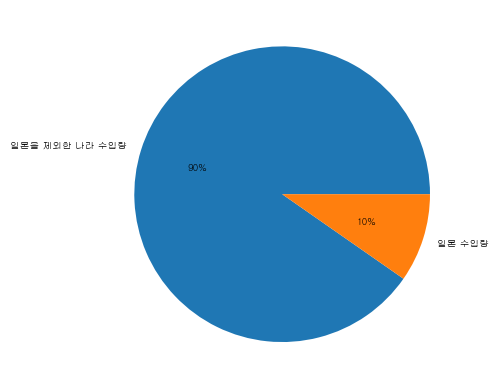

In [67]:
plt.pie([KorMinusJanISr['2020년'],KorJapImport_Sr['2020년']],labels=['일본을 제외한 나라 수입량', '일본 수입량'], autopct="%.f%%")

([<matplotlib.patches.Wedge at 0x213ecfa29a0>,
 [Text(-1.087713910309525, 0.16394648309482787, '일본을 제외한 나라 수출량'),
  Text(1.0877139122282473, -0.1639464703649369, '일본 수출량')],
 [Text(-0.5932984965324681, 0.08942535441536065, '95%'),
  Text(0.5932984975790438, -0.08942534747178375, '5%')])

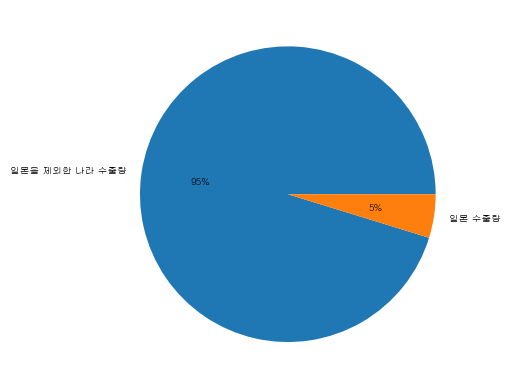

In [68]:
plt.pie([KorMinusJanESr['2020년'],KorJapExport_Sr['2020년']],labels=['일본을 제외한 나라 수출량', '일본 수출량'], autopct="%.f%%")

In [69]:
# 수출 데이터
Export_DF = pd.concat([KorAllExport_Sr,KorJapExport_Sr], axis=1).dropna().T
# 수입 데이터
Import_DF = pd.concat([KorAllImport_Sr,KorJapImport_Sr], axis=1).dropna().T
# 수출 증감률 데이터
ExportPer_DF = pd.concat([KorAllExportPer_Sr,KorJapExport_Sr], axis = 1).dropna().T
# 수입 증감률 데이터
ImportPer_DF = pd.concat([KorAllImportPer_Sr,KorJapImport_Sr], axis = 1).dropna().T

# 수출+수입 증감률 데이터
ExImPer_DF = pd.concat([KorAllImportPer_Sr,KorJapImport_Sr, KorAllExportPer_Sr], axis = 1).dropna().T


In [70]:
KorAllExport_Sr.corr(KorJapExport_Sr)

0.6523793104214566

In [71]:
# 그래프 그리기

# 폰트 파일의 경로 저장
font_file = r'C:\Windows\Fonts\gulim.ttc'

# matplotlib 패키지에 한클 폰트 설정
myFont = fm.FontProperties(fname = font_file).get_name()
mpl.rc('font', family = myFont)

In [72]:
KorJap1920_DF.columns = KorJap1920_DF.columns.strftime('%Y년 %m월')
KorJap1920_DF.columns

Index(['2019년 01월', '2019년 02월', '2019년 03월', '2019년 04월', '2019년 05월',
       '2019년 06월', '2019년 07월', '2019년 08월', '2019년 09월', '2019년 10월',
       '2019년 11월', '2019년 12월', '2020년 01월', '2020년 02월', '2020년 03월',
       '2020년 04월', '2020년 05월', '2020년 06월', '2020년 07월', '2020년 08월',
       '2020년 09월', '2020년 10월', '2020년 11월', '2020년 12월'],
      dtype='object')

In [73]:
KorJap1920_DF['2019년 07월']

한국-일본 수출량    25.0
한국-일본 수입량    42.0
Name: 2019년 07월, dtype: float64

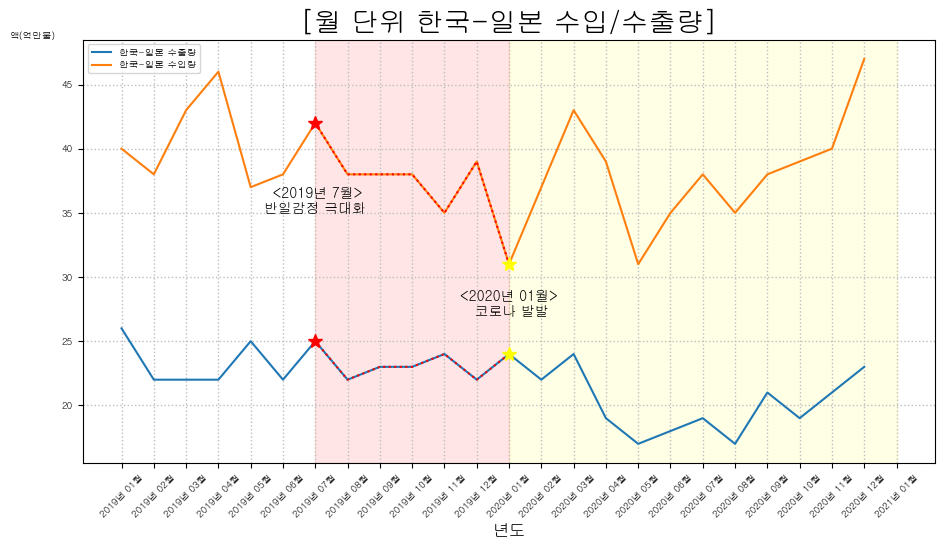

In [74]:
# 2019-2020년 월단위 수입/수출량 그래프
plt.figure(figsize=(11,5.5))
plt.plot(KorJap1920_DF.columns, KorJap1920_DF.iloc[0],KorJap1920_DF.columns,KorJap1920_DF.iloc[1])
plt.xticks(rotation = 45)
plt.xlabel('년도', size = 12)
plt.ylabel('액(억만불)',loc = 'top',rotation = 'horizontal',  color = 'k')
plt.title('[월 단위 한국-일본 수입/수출량]', size = 20)
plt.grid(True, lw = 1, ls = ':', c = '0.75')
plt.legend(KorJap1920_DF.index)
#plt.axvline('2019년',color = 'red')
box = {
        'edgecolor':'None',
        'boxstyle':'round',
        'alpha': 0.2,
        'facecolor': 'yellow'
    }
plt.text(x = '2019년 07월', y = 35, s= ' <2019년 7월>\n반일감정 극대화',size = 10,  ha = 'center')
plt.text(x = '2020년 01월', y = 27, s= '<2020년 01월>\n 코로나 발발',size = 10,  ha = 'center')
plt.axvspan('2019년 07월', '2020년 01월', color='red', alpha=0.1)
plt.axvspan('2020년 01월', '2021년 01월', color='yellow', alpha=0.1)

plt.plot('2019년 07월',[KorJap1920_DF['2019년 07월']], 'r*', markersize = 10)
plt.plot(['2019년 07월','2019년 08월','2019년 09월','2019년 10월','2019년 11월','2019년 12월','2020년 01월'],[KorJap1920_DF['2019년 07월'],KorJap1920_DF['2019년 08월'],KorJap1920_DF['2019년 09월'],KorJap1920_DF['2019년 10월'],
                                    KorJap1920_DF['2019년 11월'],KorJap1920_DF['2019년 12월'],KorJap1920_DF['2020년 01월']], 'r:')
plt.plot('2020년 01월',[KorJap1920_DF['2020년 01월']],'*', color = 'yellow',markersize = 10)

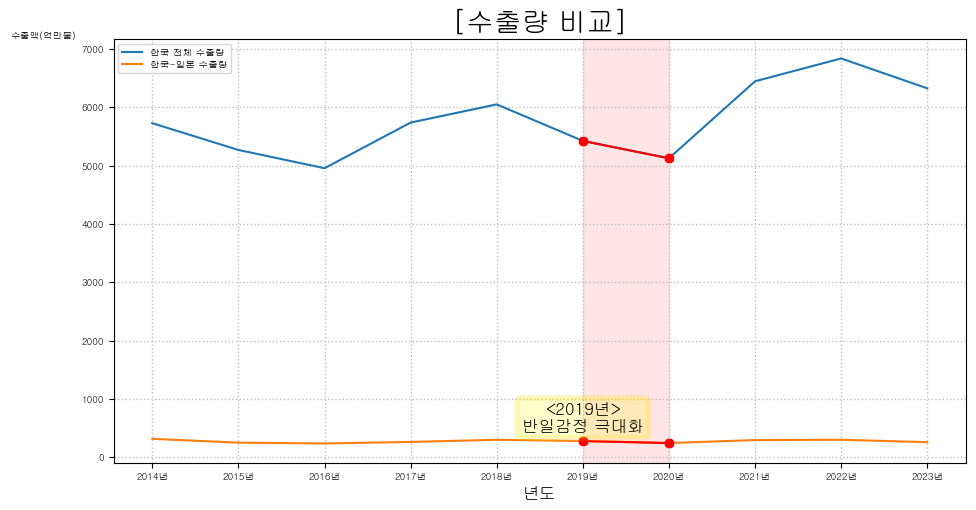

In [75]:
# 수출량 비교 그래프
plt.figure(figsize=(11,5.5))
plt.plot(Export_DF.columns, Export_DF.iloc[0], Export_DF.columns,Export_DF.iloc[1])
plt.xlabel('년도', size = 12)
plt.ylabel('수출액(억만불)',loc = 'top',rotation = 'horizontal',  color = 'k')
plt.title('[수출량 비교]', size = 20)
plt.grid(True, lw = 1, ls = ':', c = '0.75')
plt.legend(Export_DF.index)
#plt.axvline('2019년',color = 'red')
box = { 'edgecolor' :'gold',
        'boxstyle':'round',
        'alpha': 0.2,
        'facecolor': 'yellow',
        'linewidth' : 4
    }
plt.text(x = '2019년', y = 450, s= '<2019년>\n반일감정 극대화',size = 12, bbox = box, ha = 'center')
plt.axvspan('2019년', '2020년', color='red', alpha=0.1)
plt.plot(['2019년','2020년'],[Export_DF['2019년'],Export_DF['2020년']], color = 'red', marker = '8')

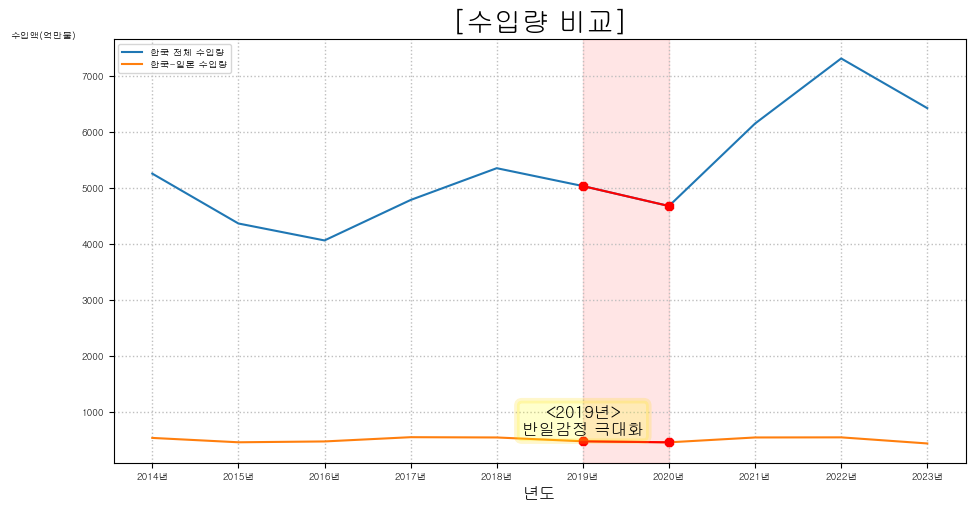

In [76]:
# 수입량 비교 그래프
plt.figure(figsize=(11,5.5))
plt.plot(Import_DF.columns, Import_DF.iloc[0], Import_DF.columns,Import_DF.iloc[1])
plt.xlabel('년도', size = 12)
plt.ylabel('수입액(억만불)',loc = 'top',rotation = 'horizontal',  color = 'k')
plt.title('[수입량 비교]', size = 20)
plt.grid(True, lw = 1, ls = ':', c = '0.75')
plt.legend(Import_DF.index)
box = {
        'edgecolor':'gold',
        'boxstyle':'round',
        'alpha': 0.2,
        'facecolor': 'yellow',
        'linewidth' : 4
    }
plt.text(x = '2019년', y = 600, s= '<2019년>\n반일감정 극대화',size = 12, bbox = box, ha = 'center')
plt.axvspan('2019년', '2020년', color='red', alpha=0.1)
plt.plot(['2019년','2020년'],[Import_DF['2019년'],Import_DF['2020년']], color = 'red', marker = '8')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2011    1 non-null      float64
 1   2012    1 non-null      float64
 2   2013    1 non-null      float64
 3   2014    1 non-null      float64
 4   2015    1 non-null      float64
 5   2016    1 non-null      float64
 6   2017    1 non-null      float64
 7   2018    1 non-null      float64
 8   2019    1 non-null      float64
 9   2020    1 non-null      float64
 10  2021    1 non-null      int64  
dtypes: float64(10), int64(1)
memory usage: 216.0 bytes


Text(2019년, 5, '<2019년>\n반일감정 극대화')

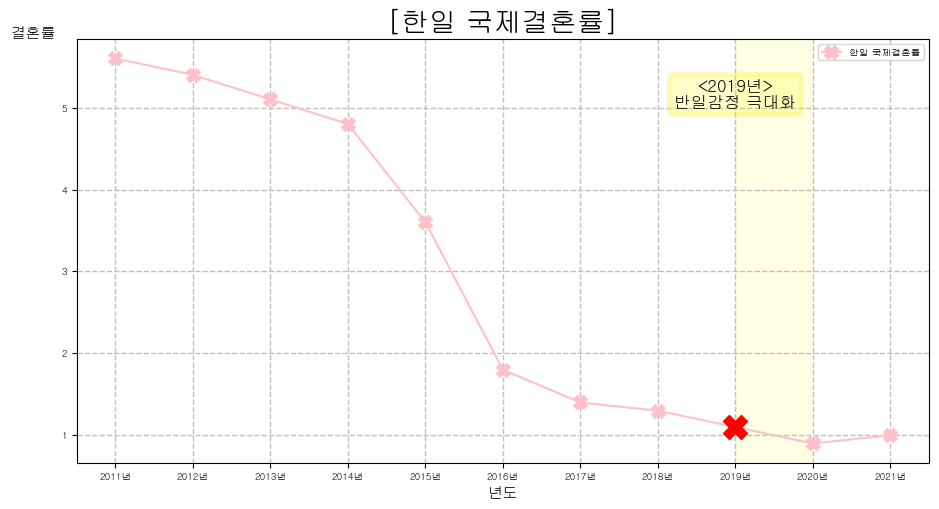

In [77]:
## 결혼 비율
merryDF = pd.read_excel('../../Project/pandasProject/ProjectData/한일 국제결혼 혼인 비율.xlsx')
merryDF.info()
# 형변환 통일
merryDF.astype('float64')

# 인덱스명 컬럼명 변경
merryDF.columns = [f'{i}년' for i in merryDF.columns]
merryDF.index = ['한일 국제결혼률']

# 그래프 그리기
plt.figure(figsize=(11,5.5))
plt.plot(merryDF.columns,merryDF.iloc[0],'-X', color = 'pink', markersize = 10.0)
plt.plot('2019년',merryDF['2019년'], 'X',color = 'red', markersize = 17)
plt.legend(labels = merryDF.index)
plt.xlabel('년도', size = 11)
plt.ylabel('결혼률',loc = 'top',rotation = 'horizontal',  color = 'k', size = 11)
plt.title('[한일 국제결혼률]', size = 20)
plt.grid(True, lw = 1, ls = '--', c = '0.75')
plt.axvspan('2019년', '2020년', color='yellow', alpha=0.1)
box = {
        'edgecolor':'gold',
        'boxstyle':'round',
        'alpha': 0.2,
        'facecolor': 'yellow',
        'linewidth' : 4
    }
plt.text(x = '2019년', y = 5, s= '<2019년>\n반일감정 극대화',size = 12, bbox = box, ha = 'center')